In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,Reshape, GlobalAveragePooling2D
# from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
np.random.seed(25)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [4]:
class_names = np.unique(y_train)
print(class_names)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [8]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(28,28,1),kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))



# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))


# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))


# Passing it to a dense layer
model.add(Flatten())


# 1st Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))


# Add Dropout to prevent overfitting
model.add(Dropout(0.5))


# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))

# Add Dropout
model.add(Dropout(0.5))

#  output Layer 
model.add(Dense(10))

model.add(Activation('softmax'))

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 7, 96)          11712     
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 7, 7, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(X_train, y_train, batch_size=64)
test_generator = test_gen.flow(X_test, y_test, batch_size=64)

In [11]:
hist = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 863s 2s/step - loss: 0.6385 - accuracy: 0.7628 - val_loss: 0.1696 - val_accuracy: 0.9480
Epoch 2/20
469/469 [==============================] - 876s 2s/step - loss: 0.1157 - accuracy: 0.9688 - val_loss: 0.1115 - val_accuracy: 0.9701
Epoch 3/20
469/469 [==============================] - 837s 2s/step - loss: 0.0813 - accuracy: 0.9780 - val_loss: 0.0979 - val_accuracy: 0.9717
Epoch 4/20
469/469 [==============================] - 1044s 2s/step - loss: 0.0690 - accuracy: 0.9823 - val_loss: 0.0879 - val_accuracy: 0.9753
Epoch 5/20
469/469 [==============================] - 797s 2s/step - loss: 0.0636 - accuracy: 0.9838 - val_loss: 0.0889 - val_accuracy: 0.9773
Epoch 6/20
469/469 [==============================] - 807s 2s/step - loss: 0.0545 - accuracy: 0.9858 - val_loss: 0.1071 - val_accuracy: 0.9715
Epoch 7/20
469/469 [==============================] - 895s 2s/step - loss: 0.0529 - accuracy: 0.9862 - val_loss: 0.0611 - val_accuracy: 0.985

In [ ]:
# model.fit(X_train, y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, y_test))

hist=model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=10, 
                    validation_data=test_generator, validation_steps=10000//64)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
937/937 [==============================] - 1048s 1s/step - loss: 0.5714 - accuracy: 0.7989 - val_loss: 0.1110 - val_accuracy: 0.9689
Epoch 2/10
937/937 [==============================] - 1033s 1s/step - loss: 0.1658 - accuracy: 0.9561 - val_loss: 0.0958 - val_accuracy: 0.9732
Epoch 3/10
937/937 [==============================] - 1011s 1s/step - loss: 0.1266 - accuracy: 0.9662 - val_loss: 0.0660 - val_accuracy: 0.9821
Epoch 4/10
937/937 [==============================] - 1013s 1s/step - loss: 0.1082 - accuracy: 0.9717 - val_loss: 0.0583 - val_accuracy: 0.9831
Epoch 5/10
937/937 [==============================] - 1019s 1s/step - loss: 0.1109 - accuracy: 0.9722 - val_loss: 0.0581 - val_accuracy: 0.9845
Epoch 6/10
937/937 [==============================] - 1021s 1s/step - loss: 0.0974 - accuracy: 0.9753 - val_loss: 0.0716 - val_accuracy: 0.9826
Epoch 7/10
937/937 [==============================] - 1010s 1s/step - loss: 0.0909 - accuracy: 0.9763 - val_loss: 0.0873 - val_accuracy:

In [13]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

TypeError: 'History' object is not subscriptable

In [14]:
score = model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 22s 69ms/step - loss: 0.0670 - accuracy: 0.98672s - loss:

Test accuracy:  0.9866999983787537


In [ ]:
------------------------------------------------------------

In [ ]:
score = model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 21s 66ms/step - loss: 0.0893 - accuracy: 0.9762

Test accuracy:  0.9761999845504761


In [ ]:
y_pred = model.predict(X_test)
y_pred_probabilities = model.predict(X_test)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_pred_probabilities

array([[2.1847082e-09, 1.4464333e-06, 1.8916661e-06, ..., 9.9994314e-01,
        1.6353164e-07, 3.9137500e-05],
       [6.3213250e-08, 2.5096672e-12, 9.9999976e-01, ..., 1.1902749e-08,
        3.0138018e-08, 1.0138460e-09],
       [3.8705213e-16, 1.0000000e+00, 1.1444318e-12, ..., 4.3878087e-12,
        1.1782617e-10, 5.0687997e-15],
       ...,
       [9.5654672e-11, 3.3935934e-11, 1.2969895e-11, ..., 6.3195642e-08,
        2.8286353e-08, 2.0996273e-04],
       [3.0498146e-17, 7.0171017e-20, 5.1534622e-20, ..., 1.1647364e-18,
        1.2081425e-13, 1.5176161e-08],
       [7.4995289e-13, 3.8259082e-17, 2.8693995e-17, ..., 4.0493186e-29,
        1.0700366e-13, 9.7054418e-21]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_original= np.argmax(y_test,axis=1)

In [ ]:
y_test_original

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(y_true=y_test_original, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.85      0.92       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.87      0.99      0.93      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
print(confusion_matrix(y_true=y_test_original, y_pred=y_pred))

[[ 976    0    2    0    0    0    1    1    0    0]
 [   0 1129    0    1    0    0    0    1    4    0]
 [   1    2 1018    1    0    0    0    4    6    0]
 [   0    0    2  995    0    2    0    0    6    5]
 [   0    0    0    0  834    0    2    6    5  135]
 [   1    0    0    4    0  884    1    0    0    2]
 [   4    5    0    0    1    6  941    0    1    0]
 [   0    1    5    0    0    1    0 1014    6    1]
 [   0    0    2    0    0    1    0    0  969    2]
 [   0    0    0    0    0    0    0    3    4 1002]]


In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
normalize=False,
title='Confusion matrix',
cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix\n============================")
  else:
    print('Confusion matrix, without normalization\n============================')


  print(cm)
  print("\n")
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()

Confusion matrix, without normalization
[[ 976    0    2    0    0    0    1    1    0    0]
 [   0 1129    0    1    0    0    0    1    4    0]
 [   1    2 1018    1    0    0    0    4    6    0]
 [   0    0    2  995    0    2    0    0    6    5]
 [   0    0    0    0  834    0    2    6    5  135]
 [   1    0    0    4    0  884    1    0    0    2]
 [   4    5    0    0    1    6  941    0    1    0]
 [   0    1    5    0    0    1    0 1014    6    1]
 [   0    0    2    0    0    1    0    0  969    2]
 [   0    0    0    0    0    0    0    3    4 1002]]


Normalized confusion matrix
[[9.96e-01 0.00e+00 2.04e-03 0.00e+00 0.00e+00 0.00e+00 1.02e-03 1.02e-03
  0.00e+00 0.00e+00]
 [0.00e+00 9.95e-01 0.00e+00 8.81e-04 0.00e+00 0.00e+00 0.00e+00 8.81e-04
  3.52e-03 0.00e+00]
 [9.69e-04 1.94e-03 9.86e-01 9.69e-04 0.00e+00 0.00e+00 0.00e+00 3.88e-03
  5.81e-03 0.00e+00]
 [0.00e+00 0.00e+00 1.98e-03 9.85e-01 0.00e+00 1.98e-03 0.00e+00 0.00e+00
  5.94e-03 4.95e-03]
 [0.00e+00 0.00e+00

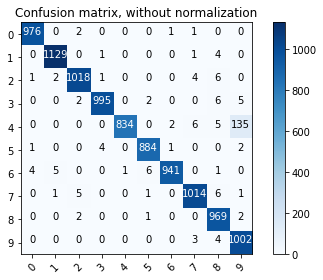

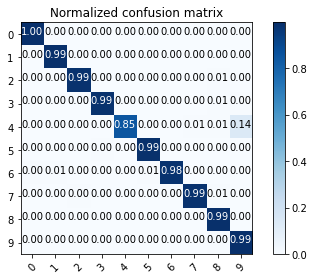

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true=y_test_original, y_pred=y_pred)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
title='Normalized confusion matrix')
plt.show()

In [ ]:
print("Precision Score : ",precision_score(y_test_original, y_pred, average='micro'))

Precision Score :  0.9762


In [ ]:
print("Recall Score : ",recall_score(y_test_original, y_pred, average='micro'))

Recall Score :  0.9762


In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_original, y_pred))

Accuracy Score :  0.9762


In [ ]:
print("F1 Score : ",f1_score(y_test_original, y_pred, average='micro'))

F1 Score :  0.9762000000000001
